In [ ]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/b9/8b/7ec1832b09dbc88f3db411f8cdd47db04505c4b72c99b11c920a8f0479c3/scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 463.5 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
white = pd.read_csv('winequality-white.csv', sep=',')
red = pd.read_csv('winequality-red.csv', sep=',')

In [22]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [23]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Data Loading and Preprocessing

In [17]:
white['wine_type'] = 'white'
red['wine_type'] = 'red'
data = pd.concat([white, red], ignore_index=True)

In [19]:
data = pd.get_dummies(data, columns=['wine_type'], drop_first=True)
X = data.drop('quality', axis=1)
y = data['quality']

## Initial Exploration

In [39]:
print(data.head())
print(data.info())
print(data.describe().T)
print(data.isnull().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  wine_type_white  
0      8.8        6             True  
1      9

## Model Training and Evaluation

In [ ]:
# Feature-Target Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.47203733312735024
R2 Score: 0.339622658249617


#### Insights: 
- Mean Squared Error (MSE) quantifies the average error squared — smaller is better.

- R² Score shows the proportion of variance explained by the model — closer to 1 means better performance.

## Visualizations

In [25]:
%pip install matplotlib seaborn

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d7/68/0d03098b3feb786cbd494df0aac15b571effda7f7cbdec267e8a8d398c16/matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/13/4c/de2612ea2216eb45cfc8eb91a8501615dd87716feaf5f8fb65cbca576289/fonttools-4.57.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Feature Correlation Heatmap')

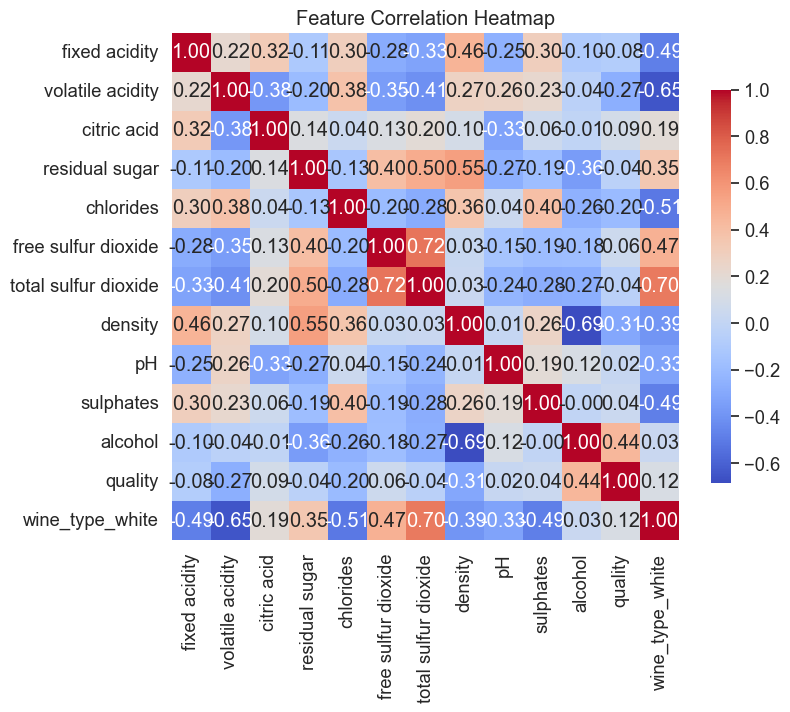

In [27]:
# Set the style for plots
sns.set(style="whitegrid", font_scale=1.2)

# --- Correlation heatmap ---
plt.figure(figsize=(18, 15))
plt.subplot(2, 2, 1)
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.75})
plt.title("Feature Correlation Heatmap")

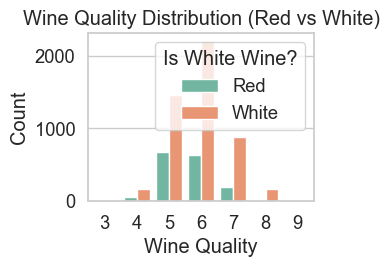

In [35]:
# --- Wine Quality Distribution ---
plt.subplot(2, 2, 2)
sns.countplot(x='quality', hue='wine_type_white', data=data, palette='Set2')
plt.title("Wine Quality Distribution (Red vs White)")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.legend(title="Is White Wine?", labels=["Red", "White"])


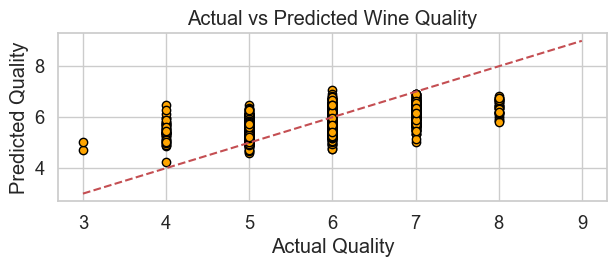

In [37]:
# --- Actual vs Predicted Quality ---

plt.subplot(2, 1, 2)
plt.scatter(y_test, y_pred, edgecolor='black', color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.tight_layout()
plt.show()

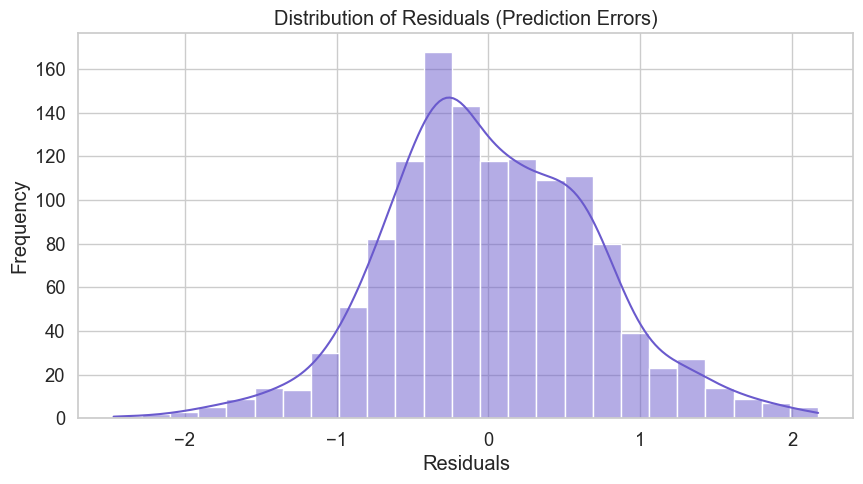

In [38]:
# --- Residual Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=25, kde=True, color='slateblue')
plt.title("Distribution of Residuals (Prediction Errors)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#### Insights
- Heatmap: Shows strong correlation of alcohol, density, sulphates with wine quality.

- Distribution Plot: Majority of wines rated between 5 and 6.

- Prediction vs Actual: Points near the red line indicate good predictions.

- Residuals Plot: Normally distributed residuals indicate a decent model fit.

## Conclusion
### Key Takeways
- Alcohol content is one of the most important factors affecting wine quality.

- Linear Regression gives a baseline model with decent interpretability.

- Future improvements could include trying non-linear models (like Random Forest, Gradient Boosting, or KNN) for better performance